# **IMPORT LIBRARIES**



In [30]:
!pip install keras_preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from tqdm import tqdm
import random
import os
import zipfile

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **UNZIP**

In [31]:
# Extract the contents of the zip file
zip_file_path = '/content/englishChar.zip' 
extracted_path = '/content/dataset'  # Update with the desired extraction folder path
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extracted_path)

# **SHOW EXAMPLE OF THE DATA**

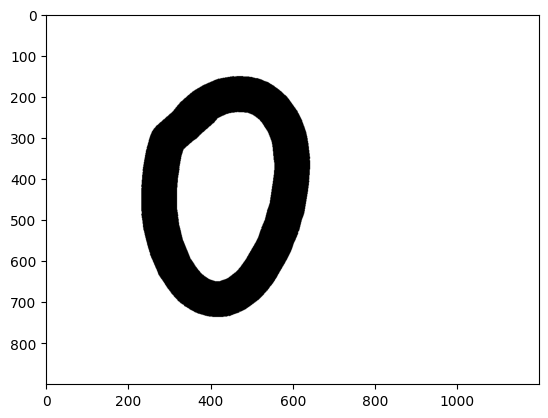

In [32]:
img = cv.imread("/content/dataset/Img/img001-001.png")
plt.imshow(img)

# **READ CSV files, print the first 5 rows**

In [33]:
df = pd.read_csv(r'/content/dataset/english.csv')
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


# **EXPLORE CLASSES**

In [34]:
classes = df['label'].unique() 
print(f'\nThe Classes:\n {classes} ')


The Classes:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'] 


# **READ IMAGES**

In [35]:
# Define the data path
DATADIR = "/content/dataset"         

# Read the csv file
dataset = pd.read_csv(DATADIR + '/english.csv')
# Get a 600 random values/rows
rand = random.sample(range(len(dataset)), 600)
# Make the random 600 as a validation data
validation_set = pd.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# Drop the 600 from the orignal data set
dataset.drop(rand, inplace=True)
# Get a 300 random rows/values from the validation set
rand = random.sample(range(len(validation_set)), 300)
# from the 300 random Create the test set 
test_set = pd.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# Drop the 300 from the validation set
validation_set.drop(rand, inplace=True)
# Show the validation set as a example
validation_set

,image,label
0,Img/img052-029.png,p
1,Img/img019-052.png,I
3,Img/img060-003.png,x
4,Img/img025-014.png,O
6,Img/img001-023.png,0
...,...,...
588,Img/img030-013.png,T
590,Img/img014-012.png,D
593,Img/img003-007.png,2
594,Img/img020-031.png,J


In [36]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=DATADIR, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=DATADIR, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=DATADIR, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2810 validated image filenames belonging to 62 classes.
Found 300 validated image filenames belonging to 62 classes.
Found 300 validated image filenames belonging to 62 classes.


# **BUILD MODEL**

In [37]:
# Define the model
model = Sequential()

# Add first Convolutional Layer
model.add(Conv2D(32, (2, 2), padding='same',
                 input_shape=(64,64,3)))
# Add a relu Activation 
model.add(Activation('relu'))

# Add a second Convolutional Layer
model.add(Conv2D(32, (2, 2)))
# Add a relu Activation 
model.add(Activation('relu'))
# Add a Max pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a Dropout layer
model.add(Dropout(0.25))

# Add third Convolutional Layer
model.add(Conv2D(64, (2, 2), padding='same'))
# Add a relu Activation 
model.add(Activation('relu'))

# Add Fourth Convolutional Layer
model.add(Conv2D(64, (2, 2)))
# Add a relu Activation 
model.add(Activation('relu'))
# Add a Max pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a Dropout Layer
model.add(Dropout(0.25))

# Add a Flatten Layer
model.add(Flatten())
# Add a Dense layer Layer
model.add(Dense(512))
# Add a Activation Layer
model.add(Activation('relu'))
# Add a Dropout Layer
model.add(Dropout(0.5))
# Add the Output Dense Layer
model.add(Dense(62, activation='softmax'))

# Compile the model
model.compile(optimizers.RMSprop(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 activation_15 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 63, 63, 32)        4128      
                                                                 
 activation_16 (Activation)  (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# **TRAIN MODEL**

In [38]:
# Train the model for 50 epochs
history = model.fit(training_data_frame, validation_data=validation_data_frame, epochs=50)

Epoch 1/50
88/88 [==============================] - 88s 975ms/step - loss: 4.1533 - accuracy: 0.0132 - val_loss: 4.1302 - val_accuracy: 0.0067
Epoch 2/50
88/88 [==============================] - 72s 821ms/step - loss: 4.1319 - accuracy: 0.0178 - val_loss: 4.1264 - val_accuracy: 0.0100
Epoch 3/50
88/88 [==============================] - 73s 825ms/step - loss: 4.1248 - accuracy: 0.0206 - val_loss: 4.1200 - val_accuracy: 0.0333
Epoch 4/50
88/88 [==============================] - 72s 820ms/step - loss: 4.0989 - accuracy: 0.0338 - val_loss: 4.0554 - val_accuracy: 0.1033
Epoch 5/50
88/88 [==============================] - 72s 819ms/step - loss: 3.9594 - accuracy: 0.0765 - val_loss: 3.7459 - val_accuracy: 0.1633
Epoch 6/50
88/88 [==============================] - 74s 841ms/step - loss: 3.6462 - accuracy: 0.1228 - val_loss: 3.2643 - val_accuracy: 0.2000
Epoch 7/50
88/88 [==============================] - 72s 819ms/step - loss: 3.3406 - accuracy: 0.1762 - val_loss: 2.9836 - val_accuracy: 0.2900

# **PLOTTING RESULT**

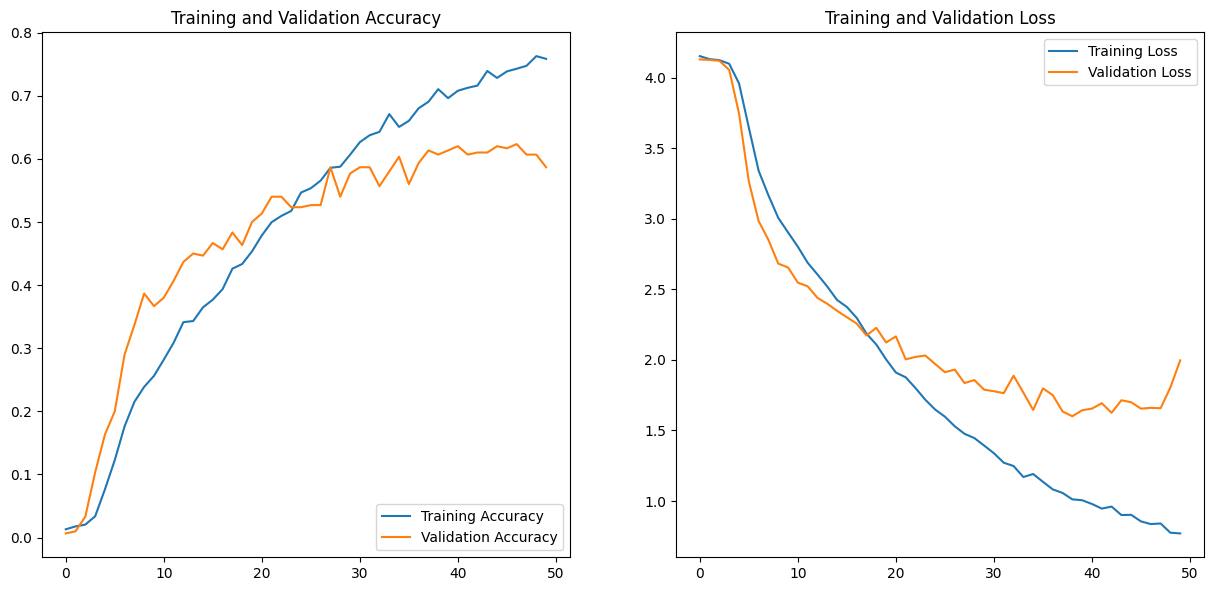

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **SAVE THE MODEL**

In [40]:
# Save the model as model.h5
model.save('model.h5')
# Load the model
model = load_model('model.h5')


In [41]:
# Print the class indices 
print("Prediction Dict: ", training_data_frame.class_indices)
# Predict on the test data 
pred = model.predict(test_data_frame)
# Create a class/labels dictionary
classDict = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

# Make a data frame that contains the probability for each class
outputDf = pd.DataFrame(pred)
# Get the index of the max probability from the output Data frame
maxIndex = list(outputDf.idxmax(axis=1))
# Print the max index
print("Max index: ", maxIndex)
# Make a loop in range the length of the test data (5)
counter = 0
for i in range(len(test_set)):
    # Read the image 
    image = cv.imread(DATADIR + '/' + test_set.at[i, 'image'])
    # The title of the plot which is the predicted label
    plt.title(classDict.get(maxIndex[i], "error"))
    if(test_set.at[i, 'label'] == classDict[maxIndex[i]]):
      counter = counter + 1
    # Show the actual image
    plt.imshow(image)
    plt.show()

print(counter)

Output hidden; open in https://colab.research.google.com to view.

In [42]:
# Menghitung train accuracy
train_loss, train_accuracy = model.evaluate(training_data_frame)
print('Train Accuracy:', train_accuracy)

# Menghitung val accuracy
val_loss, val_accuracy = model.evaluate(validation_data_frame)
print('Val Accuracy:', val_accuracy)

# menghitung test accuracy
test_accuracy = counter/300
print('Test Accuracy: ', test_accuracy)

88/88 [==============================] - 45s 511ms/step - loss: 0.4296 - accuracy: 0.8790
Train Accuracy: 0.8790035843849182
10/10 [==============================] - 4s 395ms/step - loss: 1.9968 - accuracy: 0.5867
Val Accuracy: 0.5866666436195374
Test Accuracy:  0.63
